<a href="https://colab.research.google.com/github/NidhiSahu1234/Diabetes-Predictor/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# DATA COLLECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Diabetes_Prediction_Project/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


# **DATA PREPROCESSING**

DATA CLEANING

In [ ]:
cols_with_zeros=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
diabetes_dataset[cols_with_zeros]=diabetes_dataset[cols_with_zeros].replace(0,np.nan)
for col in cols_with_zeros:
  diabetes_dataset[col].fillna(diabetes_dataset[col].median(),inplace=True)

/tmp/ipython-input-2346680217.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset[col].fillna(diabetes_dataset[col].median(),inplace=True)


SEPARATING DATA AND LABELS

In [ ]:
X=diabetes_dataset.drop(columns="Outcome",axis=1)
Y=diabetes_dataset["Outcome"]
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


DATA STANDARDISATION

In [ ]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(X)
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=diabetes_dataset["Outcome"]
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


TRAIN TEST SPLIT

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# TRAINING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    min_samples_leaf=4,
    random_state=42
)
model.fit(X_train,Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       n_estimators=200, random_state=42)

# **MODEL EVALUATION**

ACCURACY SCORE ON TRAINED DATA

In [ ]:
X_train_accuracy=model.predict(X_train)
predictions_made=len(X_train_accuracy)
print(predictions_made)

training_data_accuracy=accuracy_score(X_train_accuracy,Y_train)

614


In [ ]:
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.8859934853420195


In [ ]:
from sklearn.metrics import recall_score
risk_detection_recall = recall_score(Y_train, X_train_accuracy)
print("Risk Detection Recall:", risk_detection_recall)

Risk Detection Recall: 0.9018691588785047


ACCURACY SCORE ON TEST DATA

In [ ]:
X_test_accuracy=model.predict(X_test)
predictions_made=len(X_test_accuracy)
print(predictions_made)
test_data_accuracy=accuracy_score(X_test_accuracy,Y_test)

154


In [ ]:
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7727272727272727


MAKING PREDICTIVE SYSTEM

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45779063 -0.03198993 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# RESULT VISUALISATION

CONFUSION MATRIX

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_accuracy))

print("\nClassification Report:")
print(classification_report(Y_test, X_test_accuracy))

print("Accuracy Score:", accuracy_score(Y_test, X_test_accuracy))

Confusion Matrix:
[[81 19]
 [16 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       100
           1       0.67      0.70      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154

Accuracy Score: 0.7727272727272727


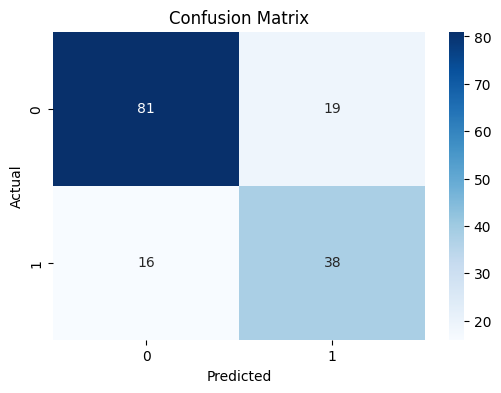

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_accuracy)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

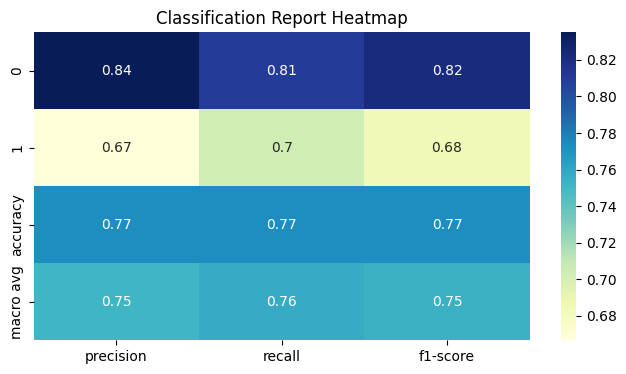

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(Y_test, X_test_accuracy, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

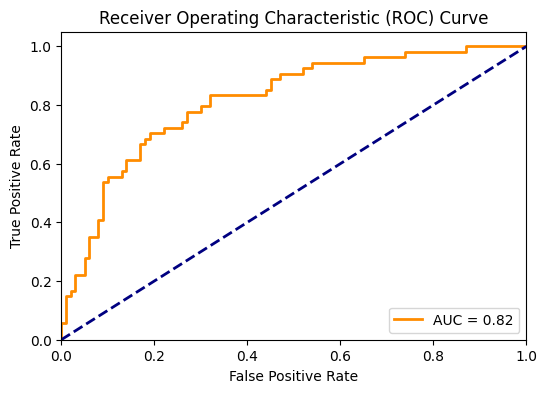

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

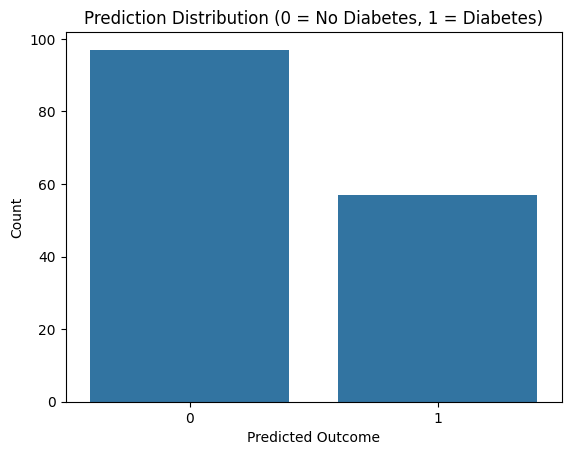

In [ ]:
sns.countplot(x=X_test_accuracy)
plt.title("Prediction Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.xlabel("Predicted Outcome")
plt.ylabel("Count")
plt.show()

In [ ]:
diabetes_dataset["Outcome Label"]=diabetes_dataset["Outcome"].map({0:"No Diabetes",1:"Diabetes"})
diabetes_dataset["Prediction"]=model.predict(X)
diabetes_dataset["Prediction Label"]=diabetes_dataset["Prediction"].map({0:"No Diabetes",1:"Diabetes"})
diabetes_dataset.to_csv("powerbi_ready.csv", index=False)
from google.colab import files
files.download("powerbi_ready.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['diabetes_model.pkl']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>